# Environment

In [55]:
import pandas as pd
import yaml
import os
import sys
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load config
CONFIG_PATH = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment/config.yaml"

# Specify which configuration to use (1-based index)
# Change this to select different configurations
CONFIG_NUMBER = 1

with open(CONFIG_PATH, 'r') as f:
    # Load all documents from the YAML file
    configs = list(yaml.safe_load_all(f))

# Select the specific configuration (subtract 1 because list is 0-based)
config = configs[CONFIG_NUMBER - 1]

# Get values from the selected config
BASE_DIR = config['base_dir']
RUN_NAME = config['run_name']
CELL_TYPE = config['cell_type']
ALIGNMENT_TYPE = config['alignment_type']
PEAKS_TYPE = config['peaks_type']

ENRICHMENT_FILE = f"{BASE_DIR}/results/{ALIGNMENT_TYPE}/cpg_enrichment/{CELL_TYPE}/{PEAKS_TYPE}/{RUN_NAME}/cpg_enrichment_parallel.csv"
print(ENRICHMENT_FILE)

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents

sys.path.append("/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment")
try:
    import functions
    importlib.reload(functions)
    from functions import *
except ModuleNotFoundError:
    print("Warning: Could not import functions module. Make sure functions.py exists in the code7_cpg_enrichment directory.")


/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/NSC/broad/cpg_enrichment_1_rep_in_cpg/cpg_enrichment_parallel.csv


# Load Data

In [56]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(ENRICHMENT_FILE)

In [57]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (14895, 32)

First few rows:


,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
0,chr1,3531624,3531843,219,611,CpG:,0.000000,3.272987,0.000000,1.0,endo_only,endo_only,False,0,2,3,3,"0.0,0.0,0.0","0.0,7.742945475121067,2.076016413022394",0,0,NaN,5.10095,3531624,3531843,219,0.000000,3.272395,0.000000,0.999819,0,1
1,chr1,3670619,3671074,455,613,CpG:,29.962999,0.000000,inf,1.0,exo_only,exo_only,False,3,0,3,3,"47.333859716142925,42.31702634371244,0.23810998528868288","0.0,0.0,0.0",0,0,6.06037,NaN,3670619,3671074,455,21.118221,0.000000,0.704810,0.000000,1,0
2,chr1,3671654,3672156,502,613,CpG:,13.596750,18.921372,0.718592,1.0,both,exo_only,False,3,3,3,3,"3.061797170525053,5.682240710315476,32.046211683417695","35.88782899408226,18.74866663412269,2.1276208831969488",1,0,5.54931;6.06037,NaN,3671654,3672156,502,13.089529,13.783088,0.962695,0.728440,2,0
3,chr1,4491701,4493673,1972,619,CpG:,7.108247,7.530761,0.943895,1.0,both,both,False,2,2,3,3,"12.19944750513073,0.0,9.125292064210223","0.0,19.079104030833523,3.513177480949108",1,0,6.0982;5.8282,4.1282,4491701,4493673,1972,5.180604,8.290910,0.728816,1.100939,2,1
4,chr1,4571641,4572075,434,619,CpG:,29.865143,0.137681,216.916069,0.5,both,exo_only,False,3,1,3,3,"16.923790716355846,19.305170516264603,53.36646880312449","0.4130419223539291,0.0,0.0",1,0,4.35039;6.82732;3.40697,NaN,4571641,4572075,434,16.646360,0.194710,0.557384,1.414214,3,0



Column names:
['chr', 'start', 'end', 'cpg_length', 'cpg_name', 'cpg_score', 'exo_signal', 'endo_signal', 'enrichment', 'pvalue', 'binding_type', 'binding_type_by_peaks', 'significant', 'exo_replicates_with_signal', 'endo_replicates_with_signal', 'total_exo_replicates', 'total_endo_replicates', 'exo_replicate_signals', 'endo_replicate_signals', 'n_exo_peaks', 'n_endo_peaks', 'exo_peak_scores_by_rep', 'endo_peak_scores_by_rep', 'analysis_start', 'analysis_end', 'analysis_length', 'exo_signal_std', 'endo_signal_std', 'exo_signal_cv', 'endo_signal_cv', 'exo_replicates_with_peaks', 'endo_replicates_with_peaks']


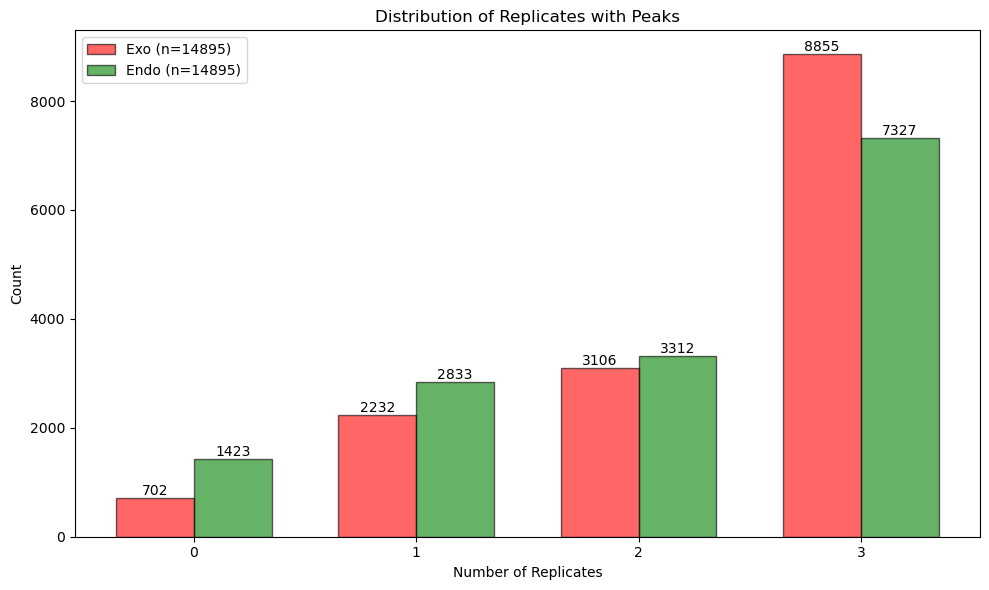

In [58]:
# Create single plot
plt.figure(figsize=(10, 6))

# Get data for plotting
x = np.arange(4)  # 0 through 3 replicates
exo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['exo_replicates_with_peaks'] == i]) for i in range(4)]
endo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['endo_replicates_with_peaks'] == i]) for i in range(4)]

# Plot bars side by side
width = 0.35
plt.bar(x - width/2, exo_counts, width, label=f'Exo (n={sum(exo_counts)})', color='red', alpha=0.6, edgecolor='black')
plt.bar(x + width/2, endo_counts, width, label=f'Endo (n={sum(endo_counts)})', color='green', alpha=0.6, edgecolor='black')

# Add value labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, exo_counts[i], str(exo_counts[i]), 
             ha='center', va='bottom')
    plt.text(x[i] + width/2, endo_counts[i], str(endo_counts[i]),
             ha='center', va='bottom')

plt.title('Distribution of Replicates with Peaks')
plt.xlabel('Number of Replicates')
plt.ylabel('Count')
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()

In [59]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Split data based on binding type

## By signal value

Non zero signal in minumum 2 replicates

In [60]:
# Split data based on binding type
exo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'exo_only']
endo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'endo_only'] 
both_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_signal)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_signal)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_signal)}")


Number of CpG islands bound by exo only: 447
Number of CpG islands bound by endo only: 265
Number of CpG islands bound by both: 14183


## By peaks number

Minimum 2 replicates with peaks

In [61]:
# Split data based on binding type
exo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'exo_only']
endo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'endo_only'] 
both_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_peaks)}")


Number of CpG islands bound by exo only: 1423
Number of CpG islands bound by endo only: 702
Number of CpG islands bound by both: 12770


# Data analysis

## Both: enrichment distribution

In [62]:
print("Summary statistics of enrichment values selected by signal:")
print(both_df_by_signal['enrichment'].describe())

print("\nSummary statistics of enrichment values selected by peaks:")
print(both_df_by_peaks['enrichment'].describe())

Summary statistics of enrichment values selected by signal:
count    14183.000000
mean         5.750296
std         81.881526
min          0.000503
25%          0.914573
50%          1.498065
75%          2.604506
max       7465.045248
Name: enrichment, dtype: float64

Summary statistics of enrichment values selected by peaks:
count    1.277000e+04
mean              inf
std               NaN
min      0.000000e+00
25%      9.278990e-01
50%      1.468810e+00
75%      2.422003e+00
max               inf
Name: enrichment, dtype: float64


/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


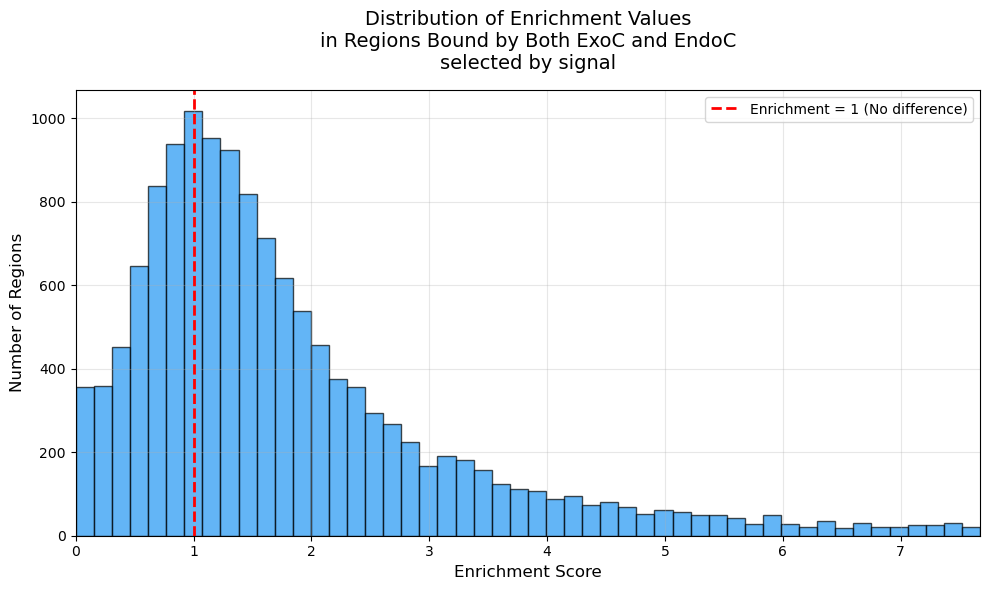

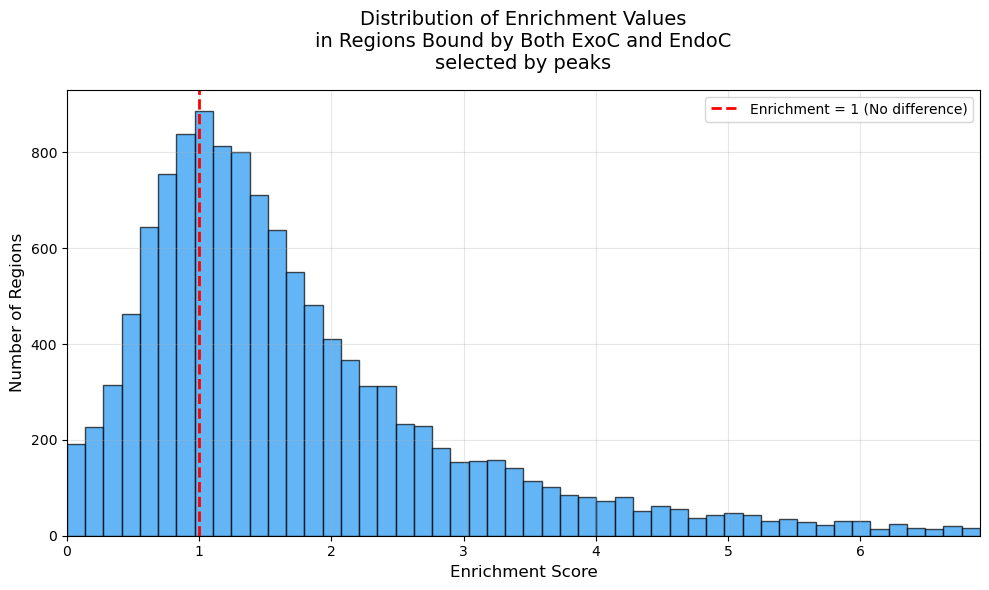

In [63]:
range_min_signal, range_max_signal = plot_enrichment_distribution(both_df_by_signal, title="selected by signal")
range_min_peaks, range_max_peaks = plot_enrichment_distribution(both_df_by_peaks, title="selected by peaks")


## Both: enrichment outliers

In [64]:
outliers_df_signal = both_df_by_signal[both_df_by_signal['enrichment'] > range_max_signal].copy()
print(f"\nNumber of outliers selected by signal(enrichment > {range_max_signal}):", len(outliers_df_signal))

outliers_df_peaks = both_df_by_peaks[both_df_by_peaks['enrichment'] > range_max_peaks].copy()
print(f"\nNumber of outliers selected by peaks(enrichment > {range_max_peaks}):", len(outliers_df_peaks))


Number of outliers selected by signal(enrichment > 7.674304469381023): 938

Number of outliers selected by peaks(enrichment > 6.904313754577789): 646


In [65]:
outliers_df_signal.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
7303,chr2,26138465,26138848,383,784,CpG:,41.594724,0.005572,7465.045248,0.666667,both,both,False,2,1,3,3,"120.99900228236424,3.785169815581399,0.0","0.016715795813279116,0.0,0.0",0,0,8.08167;3.47041,5.85944;4.40218,26138465,26138848,383,56.168564,0.007880,1.350377,1.414214,2,2
10840,chr5,137645108,137645485,377,1635,CpG:,20.479426,0.005661,3617.883227,0.500000,both,exo_only,False,3,1,3,3,"3.3222892113642604,43.92248654555262,14.19350108037893","0.016981829698901593,0.0,0.0",1,0,2.65139;3.77149;5.52901,NaN,137645108,137645485,377,17.160587,0.008005,0.837943,1.414214,3,0
11796,chr7,16313668,16314092,424,709,CpG:,12.202289,0.004593,2656.748996,0.666667,both,both,False,2,1,3,3,"9.584142588219553,0.0,27.022724547476138","0.0,0.013778820352734259,0.0",1,0,7.45551;4.90011,5.17334,16313668,16314092,424,11.186239,0.006495,0.916733,1.414214,2,1
9891,chr4,148068299,148068522,223,1714,CpG:,27.875270,0.015282,1824.015845,0.666667,both,exo_only,False,2,1,3,3,"0.0,33.715603131349845,49.91020541340781","0.0,0.045847084490173065,0.0",1,0,6.05543;7.01922,NaN,148068299,148068522,223,20.790050,0.021613,0.745824,1.414214,2,0
4793,chr15,82963242,82963451,209,1217,CpG:,5.761070,0.004084,1410.532705,0.500000,both,both,False,3,1,3,3,"8.967059906589927,6.5713805787300945,1.7447690484626441","0.012252966182653985,0.0,0.0",0,1,4.49402;4.05706,7.22819;5.69284,82963242,82963451,209,3.003645,0.005776,0.521369,1.414214,2,2


In [66]:
print_outlier_groups(outliers_df_signal, "signal")


First 5 outliers selected by signal:
chr2:26,138,465-26,138,848                        enrichment: 7465.04524773008
chr5:137,645,108-137,645,485                      enrichment: 3617.883227345621
chr7:16,313,668-16,314,092                        enrichment: 2656.748995818895
chr4:148,068,299-148,068,522                      enrichment: 1824.015844730152
chr15:82,963,242-82,963,451                       enrichment: 1410.5327049910404

Middle 5 outliers selected by signal:
chr2:144,165,464-144,165,758                      enrichment: 14.828077903155028
chr8:124,948,141-124,949,698                      enrichment: 14.737255786045749
chr2:118,916,046-118,916,378                      enrichment: 14.728412929754636
chr19:41,895,893-41,896,185                       enrichment: 14.715018736035024
chr4:105,109,426-105,109,826                      enrichment: 14.714801416821349

Last 5 outliers selected by signal:
chr15:81,745,014-81,745,344                       enrichment: 7.74056325267837
ch

In [67]:
n_rows = len(outliers_df_signal)

print("\nFirst 5 outliers selected by signal:")
for _, row in outliers_df_signal[:5].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

if n_rows > 10:
    mid_start = n_rows//2 - 2
    print("\nMiddle 5 outliers selected by signal:")
    for _, row in outliers_df_signal[mid_start:mid_start+5].iterrows():
        print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

print("\nLast 5 outliers selected by signal:")
for _, row in outliers_df_signal[-5:].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")


First 5 outliers selected by signal:
chr2:26,138,465-26,138,848                        enrichment: 7465.04524773008
chr5:137,645,108-137,645,485                      enrichment: 3617.883227345621
chr7:16,313,668-16,314,092                        enrichment: 2656.748995818895
chr4:148,068,299-148,068,522                      enrichment: 1824.015844730152
chr15:82,963,242-82,963,451                       enrichment: 1410.5327049910404

Middle 5 outliers selected by signal:
chr2:144,165,464-144,165,758                      enrichment: 14.828077903155028
chr8:124,948,141-124,949,698                      enrichment: 14.737255786045749
chr2:118,916,046-118,916,378                      enrichment: 14.728412929754636
chr19:41,895,893-41,896,185                       enrichment: 14.715018736035024
chr4:105,109,426-105,109,826                      enrichment: 14.714801416821349

Last 5 outliers selected by signal:
chr15:81,745,014-81,745,344                       enrichment: 7.74056325267837
ch

In [68]:
print_outlier_groups(outliers_df_peaks, "peaks")


First 5 outliers selected by peaks:
chrX:155,622,659-155,623,834                      enrichment: inf
chr10:80,656,107-80,656,330                       enrichment: inf
chr12:112,909,106-112,909,372                     enrichment: inf
chr5:139,324,992-139,325,322                      enrichment: inf
chr2:154,558,715-154,558,959                      enrichment: inf

Middle 5 outliers selected by peaks:
chr11:96,332,715-96,333,268                       enrichment: 11.872579466199316
chr11:94,521,255-94,521,557                       enrichment: 11.842340042393158
chr13:54,055,106-54,055,780                       enrichment: 11.833386894712977
chr11:74,522,360-74,523,429                       enrichment: 11.823489003774226
chr9:56,795,771-56,797,068                        enrichment: 11.820516671627695

Last 5 outliers selected by peaks:
chr18:37,143,448-37,144,497                       enrichment: 6.952847092322687
chr12:54,203,111-54,203,938                       enrichment: 6.9520441294

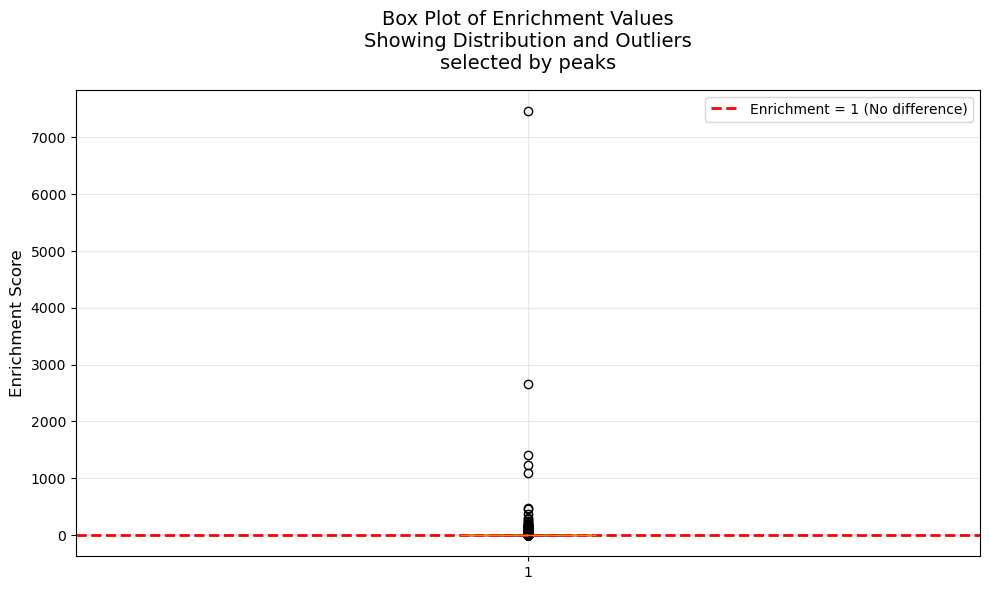

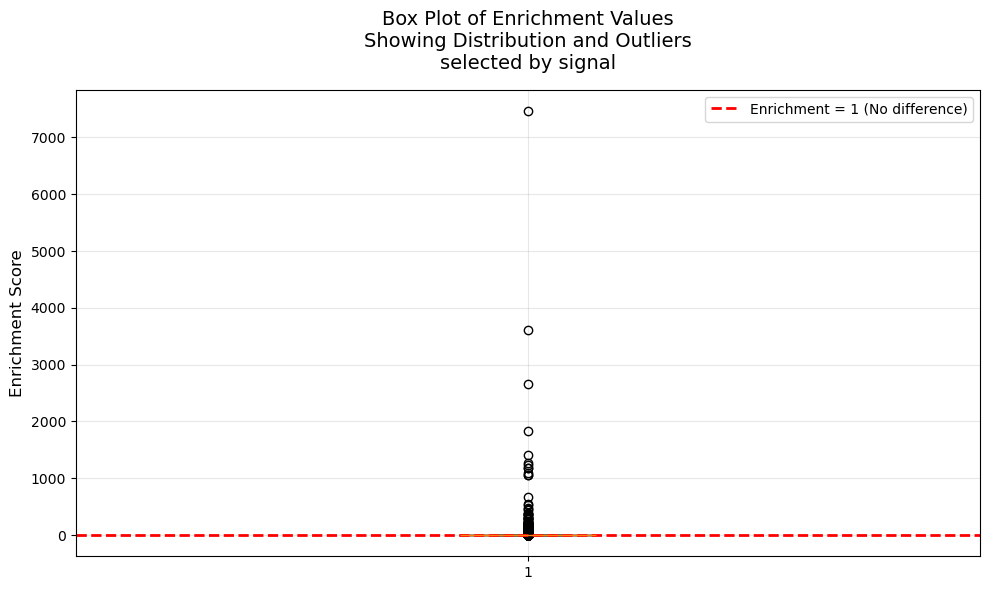

In [69]:
plot_enrichment_boxplot(both_df_by_peaks, title="selected by peaks")
plot_enrichment_boxplot(both_df_by_signal, title="selected by signal")

In [70]:
outliers_df_signal["endo_replicates_with_peaks"].value_counts()

signal_endo_zero_peaks  = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 0]
signal_endo_one_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 1]
signal_endo_two_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 2]
signal_endo_three_peaks = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 3]

outliers_df_peaks["endo_replicates_with_peaks"].value_counts()

peaks_endo_zero_peaks  = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 0]
peaks_endo_one_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 1]
peaks_endo_two_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 2]
peaks_endo_three_peaks = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 3]

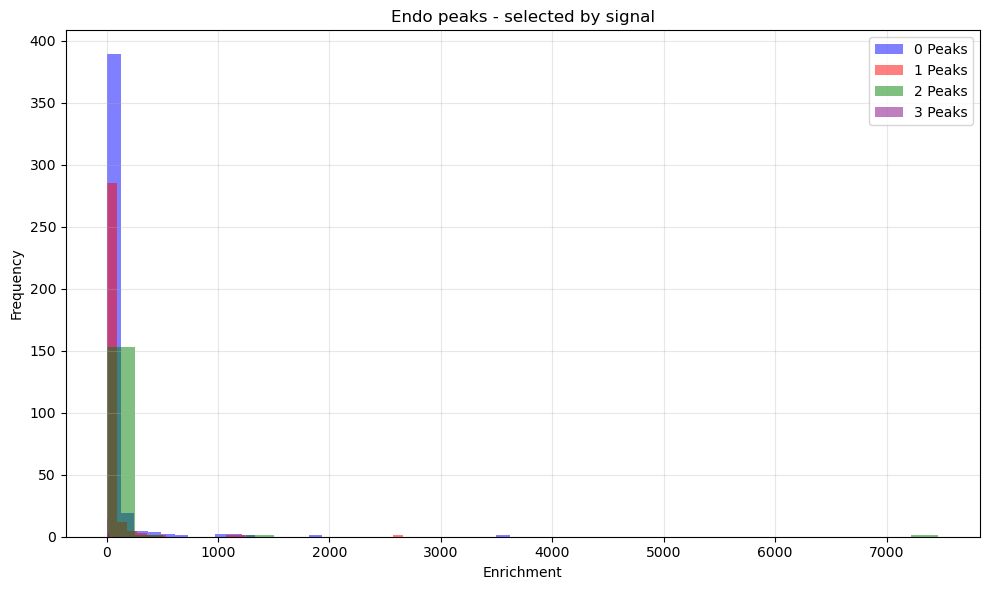

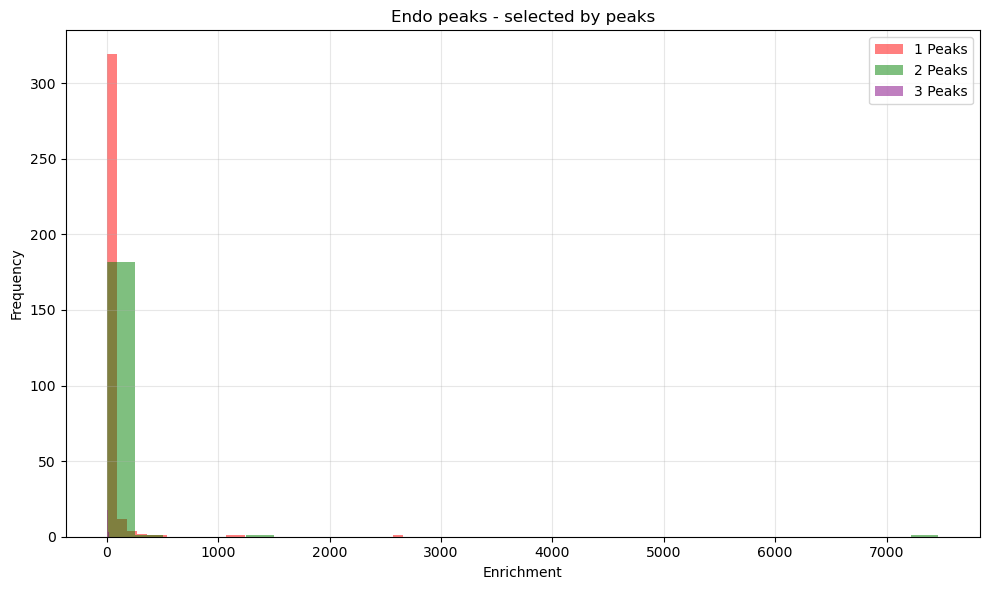

In [71]:
# Classify and plot for signal and peaks outliers
peaks_zero_peaks_signal, peaks_one_peaks_signal, peaks_two_peaks_signal, peaks_three_peaks_signal = plot_by_peaks(outliers_df_signal, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by signal")
peaks_zero_peaks_peaks, peaks_one_peaks_peaks, peaks_two_peaks_peaks, peaks_three_peaks_peaks = plot_by_peaks(outliers_df_peaks, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by peaks")

In [72]:
print_outlier_groups(peaks_two_peaks_peaks, "peaks")


First 5 outliers selected by peaks:
chr11:102,994,927-102,995,168                     enrichment: inf
chr8:45,025,658-45,025,904                        enrichment: inf
chr9:34,486,091-34,486,336                        enrichment: inf
chr8:95,633,469-95,633,889                        enrichment: inf
chr2:26,138,465-26,138,848                        enrichment: 7465.04524773008

Middle 5 outliers selected by peaks:
chr12:36,042,030-36,042,546                       enrichment: 9.955764723034616
chr17:33,358,432-33,358,707                       enrichment: 9.90663511142179
chr15:31,367,028-31,368,006                       enrichment: 9.905459104175582
chr6:113,392,417-113,392,955                      enrichment: 9.848668043120044
chr7:19,619,508-19,619,849                        enrichment: 9.807070467524795

Last 5 outliers selected by peaks:
chr13:96,542,873-96,543,417                       enrichment: 7.077838199130151
chr7:99,979,742-99,980,503                        enrichment: 6.991

In [73]:
print_outlier_groups(peaks_two_peaks_signal, "signal")


First 5 outliers selected by signal:
chr2:26,138,465-26,138,848                        enrichment: 7465.04524773008
chr15:82,963,242-82,963,451                       enrichment: 1410.5327049910404
chr3:105,458,909-105,459,252                      enrichment: 472.08986556844354
chr1:37,540,315-37,540,920                        enrichment: 189.4482096759889
chr7:29,332,166-29,332,375                        enrichment: 120.21124730795916

Middle 5 outliers selected by signal:
chr2:181,837,868-181,838,110                      enrichment: 11.322909033587583
chr15:92,396,922-92,397,500                       enrichment: 11.243301899892517
chr13:38,527,875-38,528,545                       enrichment: 11.236536648770004
chr3:129,218,629-129,218,932                      enrichment: 11.171112143211554
chr2:29,802,585-29,803,122                        enrichment: 10.90675503766118

Last 5 outliers selected by signal:
chr14:79,768,453-79,771,419                       enrichment: 7.794671581311245


## IGV: examples

## Regions length distribution

### CpG length - defined by the CpG coordinates

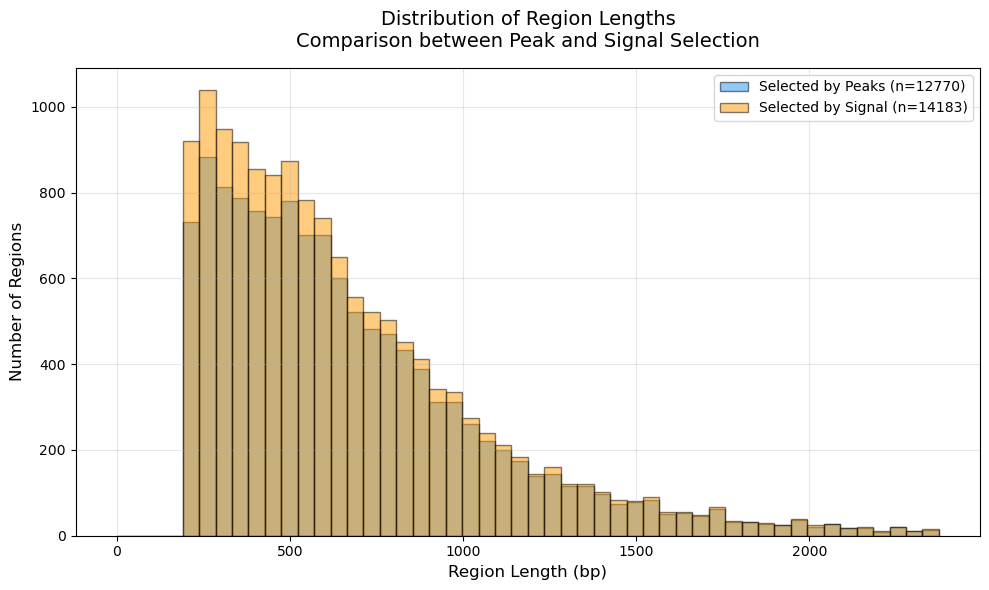

In [74]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='cpg_length')

In [75]:
both_df_sorted_by_cpg_length_peaks = both_df_by_peaks.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_peaks.head()
print_outlier_groups(both_df_sorted_by_cpg_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr8:92,355,697-92,360,826                        enrichment: 1.4677819359572175
chr5:33,430,439-33,435,552                        enrichment: 1.8037131008868768
chrX:12,086,982-12,092,060                        enrichment: 1.097693232908178
chrX:12,076,861-12,081,915                        enrichment: 1.5051353762337012
chr17:34,118,396-34,122,981                       enrichment: 0.8140642566667847

Middle 5 outliers selected by peaks:
chr13:21,981,189-21,981,771                       enrichment: 0.9614728157333958
chr12:9,029,921-9,030,503                         enrichment: 0.8704695115844517
chr12:103,425,495-103,426,077                     enrichment: 2.3927537639284826
chr14:20,734,106-20,734,688                       enrichment: 1.7482442761900716
chr1:79,761,251-79,761,833                        enrichment: 1.755525637914301

Last 5 outliers selected by peaks:
chr11:85,310,616-85,310,817                       enrichment: 1.646938097041621
c

In [76]:
both_df_sorted_by_cpg_length_signal = both_df_by_signal.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_signal.head()
print_outlier_groups(both_df_sorted_by_cpg_length_signal, "signal")


First 5 outliers selected by signal:
chr8:92,355,697-92,360,826                        enrichment: 1.4677819359572175
chr5:33,430,439-33,435,552                        enrichment: 1.8037131008868768
chrX:12,086,982-12,092,060                        enrichment: 1.097693232908178
chrX:12,076,861-12,081,915                        enrichment: 1.5051353762337012
chr17:34,118,396-34,122,981                       enrichment: 0.8140642566667847

Middle 5 outliers selected by signal:
chr17:37,046,103-37,046,668                       enrichment: 1.9628813372999048
chr12:75,669,333-75,669,898                       enrichment: 1.411395868055123
chr11:77,348,100-77,348,664                       enrichment: 1.6314726000809776
chr2:31,974,180-31,974,744                        enrichment: 3.1839316680131216
chr12:112,976,414-112,976,978                     enrichment: 0.5018619347139684

Last 5 outliers selected by signal:
chr15:11,383,928-11,384,129                       enrichment: 0.06894542927893

### IGV: examples

# Exo only

In [77]:
exo_only_df_by_peaks.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
2418,chr11,98327044,98328778,1734,1335,CpG:,6.854713,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,3,"7.990108608787035,3.232515680473706,9.34151445980578","0.0,0.0,0.0",1,0,3.73655;3.1542,NaN,98327044,98328778,1734,2.620027,0.0,0.382223,0.0,2,0
8106,chr2,153492290,153492775,485,1756,CpG:,10.478198,0.0,inf,1.0,exo_only,exo_only,False,2,0,3,3,"4.750488743339617,26.684104919433594,0.0","0.0,0.0,0.0",1,0,5.97111;7.01922,NaN,153492290,153492775,485,11.622259,0.0,1.109185,0.0,2,0
48,chr1,17091517,17091971,454,715,CpG:,20.137771,0.0,inf,1.0,exo_only,exo_only,False,2,0,3,3,"34.59418138008286,0.0,25.819131307139795","0.0,0.0,0.0",1,0,5.67863;7.84621,NaN,17091517,17091971,454,14.683273,0.0,0.729141,0.0,2,0
51,chr1,19104571,19104923,352,730,CpG:,3.841673,0.0,inf,1.0,exo_only,exo_only,False,2,0,3,3,"11.307318889281966,0.0,0.21770102937113156","0.0,0.0,0.0",0,0,4.85382,NaN,19104571,19104923,352,5.279757,0.0,1.374338,0.0,1,0
50,chr1,17145467,17145795,328,715,CpG:,37.652118,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,3,"64.65222805302318,13.420655669235602,34.8834710004853","0.0,0.0,0.0",0,0,7.61708;3.42752,NaN,17145467,17145795,328,21.006627,0.0,0.557914,0.0,2,0


In [78]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'cpg_length', 'pvalue']

stats_df = exo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by peaks, size:", len(exo_only_df_by_peaks))
stats_df

Exo only - by peaks, size: 1423


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,1423.000000,1423.000000,1072.000000,1423.000000,1423.000000
mean,14.666325,2.932745,29.719674,512.327477,0.760248
std,13.545708,4.465632,153.996788,361.779835,0.287405
min,0.000000,0.000000,0.000000,201.000000,0.100000
25%,5.192752,0.013920,1.644011,264.000000,0.500000
50%,10.847140,1.175036,5.258141,392.000000,1.000000
75%,20.121235,3.682444,15.024337,617.000000,1.000000
max,91.254654,34.786133,3617.883227,2785.000000,1.000000


In [79]:
stats_df = exo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by signal, size:", len(exo_only_df_by_signal))
stats_df

Exo only - by signal, size: 447


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,447.000000,447.0,0.0,447.000000,447.0
mean,11.035552,0.0,NaN,388.172260,1.0
std,10.488036,0.0,NaN,232.757383,0.0
min,0.013931,0.0,NaN,201.000000,1.0
25%,3.179762,0.0,NaN,240.000000,1.0
50%,8.182550,0.0,NaN,309.000000,1.0
75%,15.756636,0.0,NaN,441.000000,1.0
max,77.012727,0.0,NaN,1734.000000,1.0


In [80]:
print_across_distribution(exo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr11:98,327,044-98,328,778                       enrichment: inf
chr2:153,492,290-153,492,775                      enrichment: inf
chr1:17,091,517-17,091,971                        enrichment: inf
chr1:19,104,571-19,104,923                        enrichment: inf
chr1:17,145,467-17,145,795                        enrichment: inf

Middle 5 elements selected by peaks:
chr3:96,474,858-96,475,267                        enrichment: 9.796699002188667
chr15:76,246,768-76,247,202                       enrichment: 9.780374513473236
chr5:24,598,539-24,598,982                        enrichment: 9.7682528035262
chr9:54,765,477-54,765,900                        enrichment: 9.763595193086449
chr1:166,308,841-166,309,482                      enrichment: 9.742196154824397

Last 5 elements selected by peaks:
chr9:65,371,867-65,372,106                        enrichment: 0.0
chr19:45,159,075-45,159,368                       enrichment: 0.0
chr13:54,737,666-54,738,409  

In [81]:
print_across_distribution(exo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr11:98,327,044-98,328,778                       enrichment: inf
chrX:155,622,659-155,623,834                      enrichment: inf
chr2:153,492,290-153,492,775                      enrichment: inf
chr1:17,091,517-17,091,971                        enrichment: inf
chr1:19,104,571-19,104,923                        enrichment: inf

Middle 5 elements selected by signal:
chr11:43,490,907-43,491,181                       enrichment: inf
chr8:105,880,834-105,881,279                      enrichment: inf
chr4:128,630,228-128,630,484                      enrichment: inf
chr4:127,125,892-127,126,264                      enrichment: inf
chr4:128,767,041-128,767,520                      enrichment: inf

Last 5 elements selected by signal:
chr5:37,163,077-37,163,496                        enrichment: inf
chr13:61,665,839-61,666,101                       enrichment: inf
chr16:94,079,639-94,079,844                       enrichment: inf
chr15:76,697,862-76,698,082 

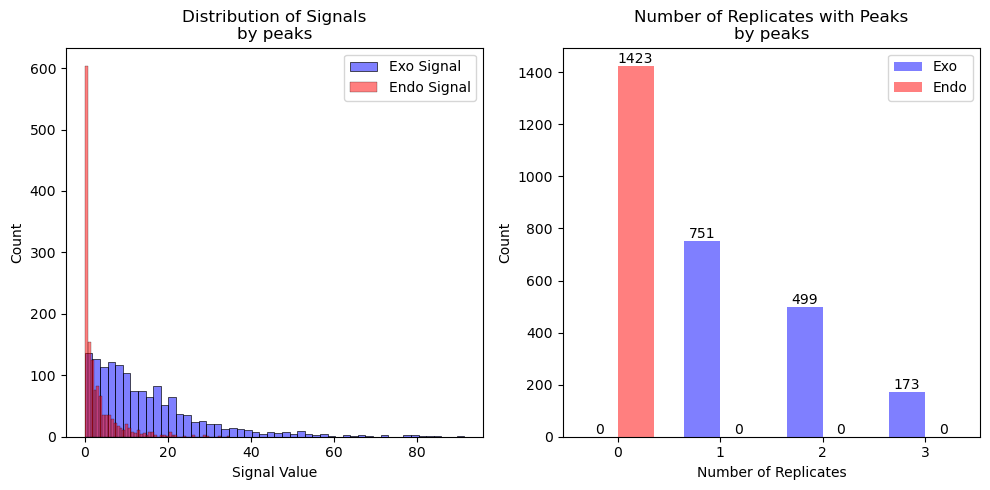

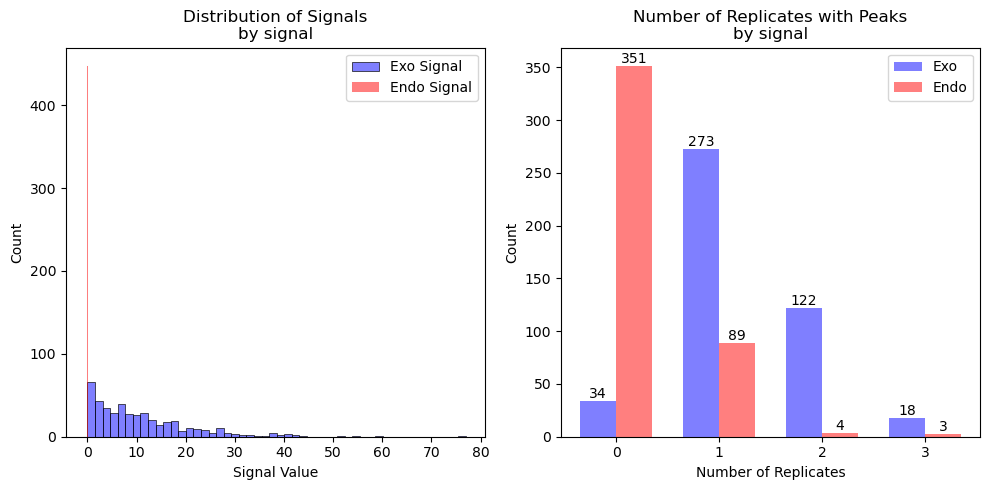

In [82]:
plot_exo_only_distributions_no_length_distribution(exo_only_df_by_peaks, title="by peaks")
plot_exo_only_distributions_no_length_distribution(exo_only_df_by_signal, title="by signal")

# Endo only

In [83]:
endo_only_df_by_peaks.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
6395,chr18,37020351,37020802,451,867,CpG:,0.659523,0.0,inf,1.0,exo_only,endo_only,False,2,0,3,3,"0.0,1.0411179409323141,0.9374510263920888","0.0,0.0,0.0",0,1,NaN,4.49642,37020351,37020802,451,0.468270,0.0,0.710013,0.0,0,1
12811,chr7,144284660,144284867,207,1685,CpG:,2.576446,0.0,inf,1.0,exo_only,endo_only,False,2,0,3,3,"6.708103573840598,0.0,1.0212348163991734","0.0,0.0,0.0",0,0,NaN,4.05161,144284660,144284867,207,2.951121,0.0,1.145423,0.0,0,1
5241,chr16,23431240,23431460,220,763,CpG:,5.290214,0.0,inf,1.0,exo_only,endo_only,False,2,0,3,3,"5.0606183572248975,0.0,10.810022787614303","0.0,0.0,0.0",0,1,NaN,5.55733,23431240,23431460,220,4.416158,0.0,0.834779,0.0,0,1
12900,chr8,14962535,14962751,216,699,CpG:,0.157494,0.0,inf,1.0,exo_only,endo_only,False,1,0,3,3,"0.47248053550720215,0.0,0.0","0.0,0.0,0.0",0,0,NaN,3.18382,14962535,14962751,216,0.222729,0.0,1.414214,0.0,0,1
2400,chr11,97575034,97575455,421,1329,CpG:,0.634191,0.0,inf,1.0,exo_only,endo_only,False,1,0,3,3,"1.902573372575846,0.0,0.0","0.0,0.0,0.0",0,0,NaN,6.8132,97575034,97575455,421,0.896882,0.0,1.414214,0.0,0,1


In [84]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'cpg_length', 'pvalue']

stats_df = endo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by peaks, size:", len(endo_only_df_by_peaks))
stats_df

endo only - by peaks, size: 702


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,702.000000,702.000000,668.000000,702.000000,702.000000
mean,2.963157,10.146674,1.763631,435.233618,0.835375
std,5.260902,9.946330,14.957768,308.999951,0.237232
min,0.000000,0.000000,0.000000,201.000000,0.100000
25%,0.000000,2.918831,0.000000,256.000000,0.666667
50%,0.901533,7.471424,0.114481,337.000000,1.000000
75%,3.301656,14.303273,0.557412,488.000000,1.000000
max,36.398320,76.996508,305.039335,3089.000000,1.000000


In [85]:
stats_df = endo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by signal, size:", len(endo_only_df_by_signal))
stats_df

endo only - by signal, size: 265


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,265.0,265.000000,265.0,265.000000,265.0
mean,0.0,10.125680,0.0,340.837736,1.0
std,0.0,9.889029,0.0,175.622637,0.0
min,0.0,0.003306,0.0,201.000000,1.0
25%,0.0,3.090027,0.0,229.000000,1.0
50%,0.0,7.630175,0.0,286.000000,1.0
75%,0.0,14.129353,0.0,377.000000,1.0
max,0.0,76.996508,0.0,1370.000000,1.0


In [86]:
print_across_distribution(endo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr18:37,020,351-37,020,802                       enrichment: inf
chr7:144,284,660-144,284,867                      enrichment: inf
chr16:23,431,240-23,431,460                       enrichment: inf
chr8:14,962,535-14,962,751                        enrichment: inf
chr11:97,575,034-97,575,455                       enrichment: inf

Middle 5 elements selected by peaks:
chr18:42,401,357-42,401,676                       enrichment: 0.1313615072227618
chr7:16,312,088-16,312,450                        enrichment: 0.1286858939684196
chr4:126,609,607-126,610,142                      enrichment: 0.1280253660121413
chr13:107,645,283-107,645,600                     enrichment: 0.1278192658327342
chr12:118,843,094-118,843,351                     enrichment: 0.1274150572462838

Last 5 elements selected by peaks:
chr18:73,970,126-73,970,413                       enrichment: 0.0
chr12:65,225,693-65,226,020                       enrichment: 0.0
chr12:76,152,507-76,15

In [87]:
print_across_distribution(endo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr1:75,450,376-75,450,680                        enrichment: 0.0
chr1:75,384,918-75,385,180                        enrichment: 0.0
chrX:55,643,327-55,643,560                        enrichment: 0.0
chrX:49,493,802-49,494,341                        enrichment: 0.0
chr5:73,133,262-73,133,498                        enrichment: 0.0

Middle 5 elements selected by signal:
chr3:94,757,650-94,758,321                        enrichment: 0.0
chr15:82,340,991-82,341,413                       enrichment: 0.0
chr5:140,735,511-140,735,799                      enrichment: 0.0
chr5:144,545,394-144,546,764                      enrichment: 0.0
chr12:113,098,723-113,099,001                     enrichment: 0.0

Last 5 elements selected by signal:
chr18:73,970,126-73,970,413                       enrichment: 0.0
chr12:65,225,693-65,226,020                       enrichment: 0.0
chr12:76,152,507-76,152,762                       enrichment: 0.0
chr5:74,620,010-74,620,304  

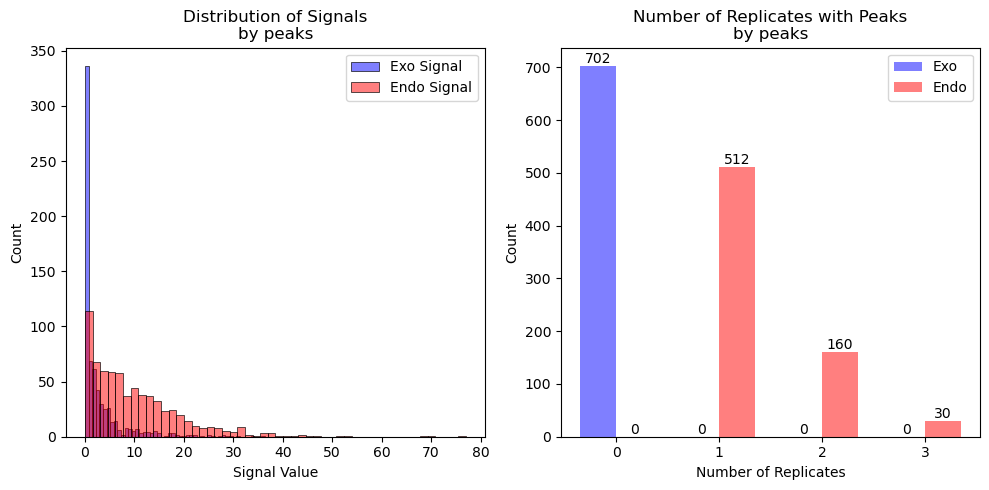

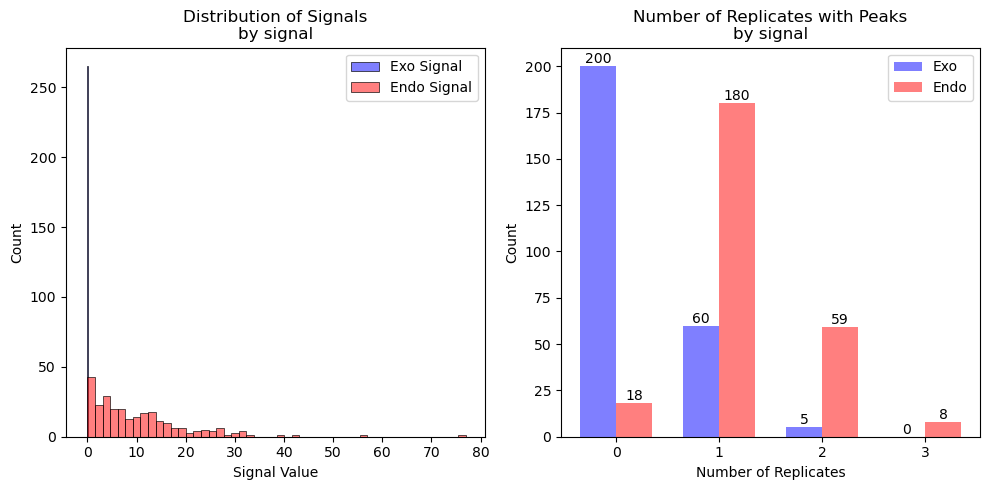

In [88]:
plot_exo_only_distributions_no_length_distribution(endo_only_df_by_peaks, title="by peaks")
plot_exo_only_distributions_no_length_distribution(endo_only_df_by_signal, title="by signal")